In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
from matplotlib.lines import Line2D

In [415]:
def loadData():
    data = pd.read_csv("Dataset.csv",header=None)
    data.columns=["X","Y"]
    return data
data=loadData()
# print(data.head(10))

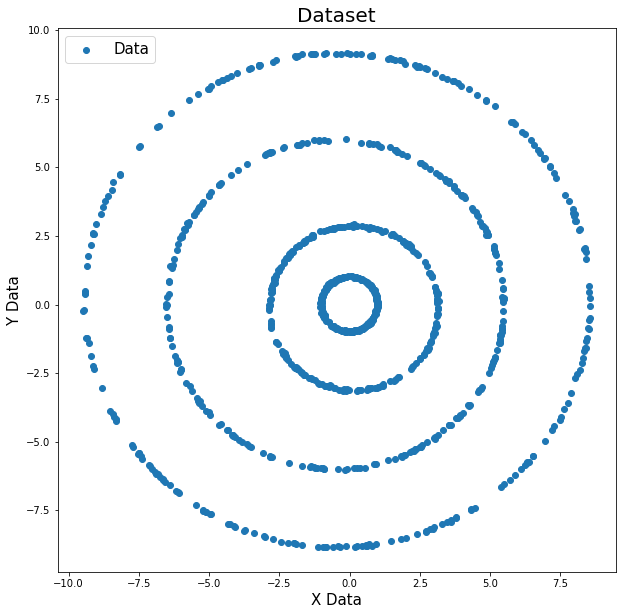

In [416]:
def changeDataStructure(data):
    data_numpy=data.to_numpy()
    data_numpy=data_numpy.transpose()
    return data_numpy

data=loadData()
data=changeDataStructure(data)

# plot dataset
plt.figure(figsize=(10, 10))
plt.scatter(data[0],data[1],label="Data")
plt.title("Dataset",fontsize=20)
plt.xlabel("X Data",fontsize=15)
plt.ylabel("Y Data",fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

# 2.1 Five random initializations and plots obtained

Random initialization 0


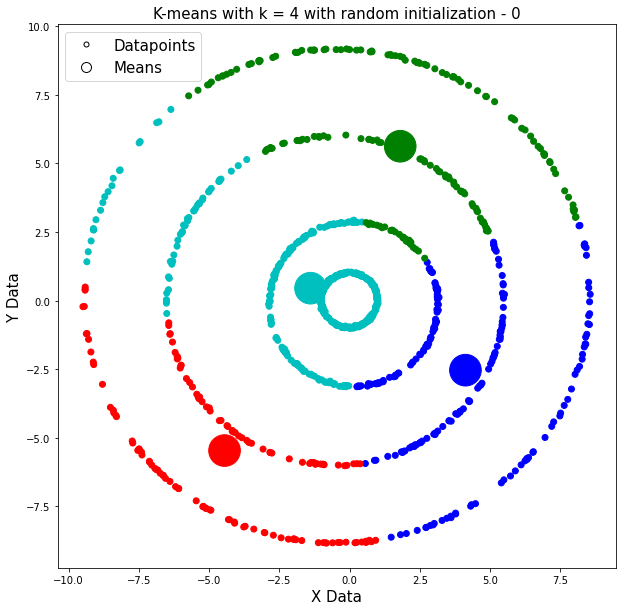

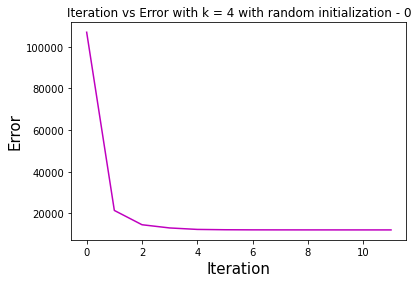

Random initialization 1


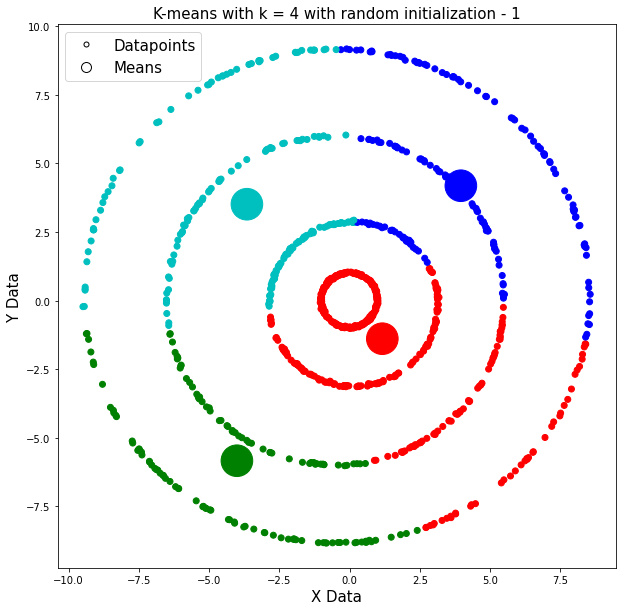

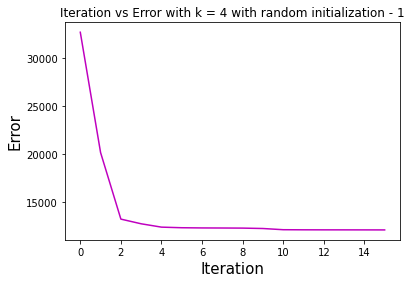

Random initialization 2


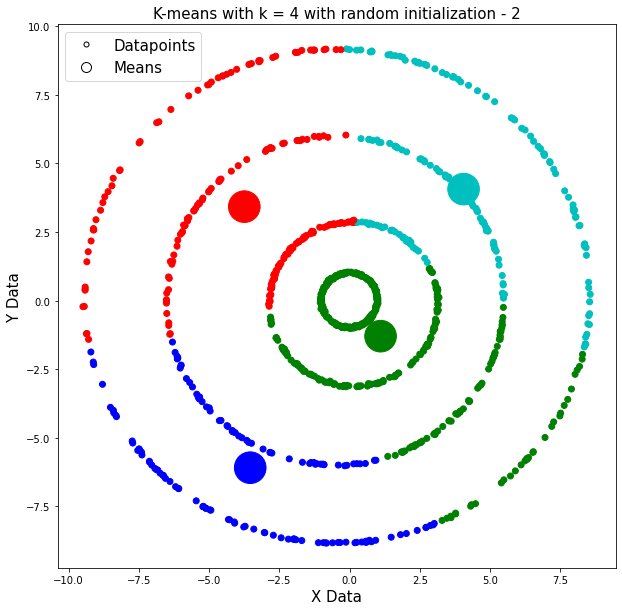

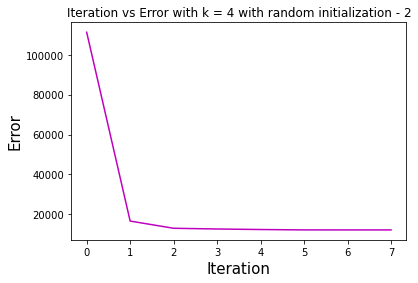

Random initialization 3


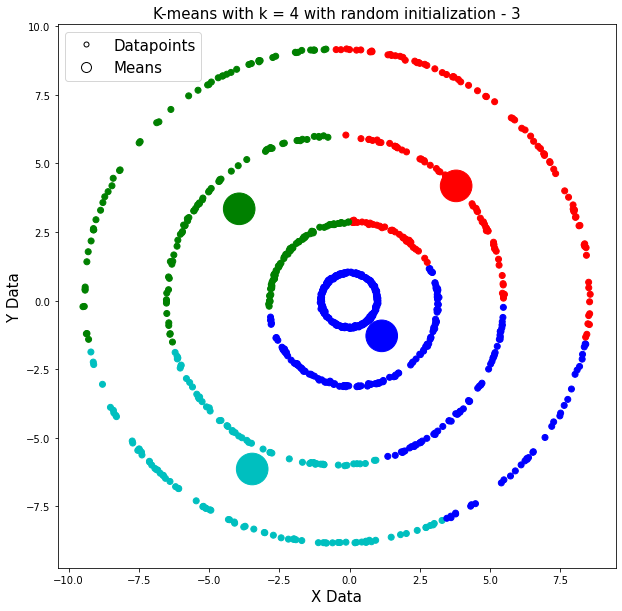

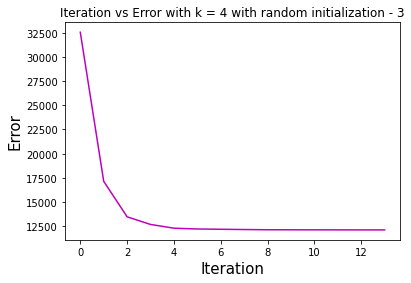

Random initialization 4


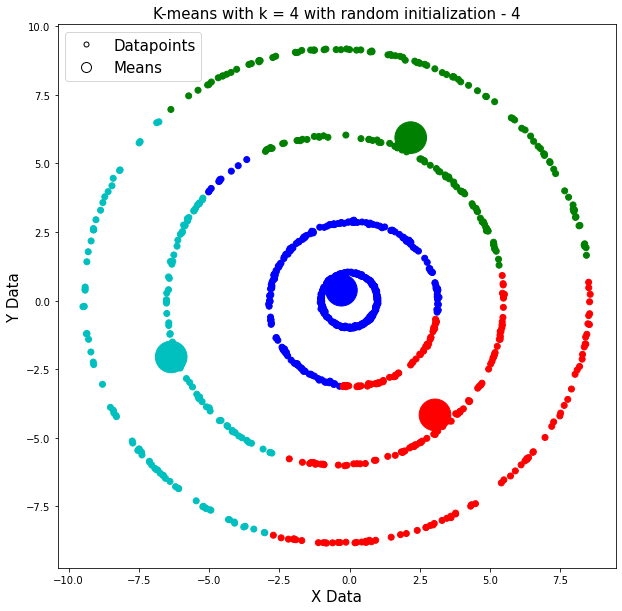

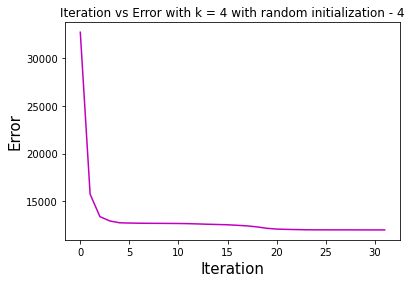

In [417]:
LABEL_COLOR_LIST=["b","g","r","c","m","y","k","w"]

def findError(x,mean):
    sub=x-mean
    error=np.dot(sub,sub)
    return error

#find mean nearest to a point
def getIndicatorOfX(x,means,curr_indicator):
    index=curr_indicator
    k=means.shape[1]
    n=means.shape[0]
    curr_mean=means[:,curr_indicator]
    small=findError(x,curr_mean)
    for i in range(k):
        mean=means[:,i]
        val=findError(x,mean)
        if(small > val):
            small=val
            index=i

    return index

#re-assignemnet step
def assignMean(data,indicator,means):
    m=data.shape[1]
    for i in range(m):
        temp_ind=indicator[i]
        indicator[i]=getIndicatorOfX(data[:,i],means,temp_ind)
    return indicator

#computing mean step
def computeMean(data,means,indicator):
    m=data.shape[1]
    n=data.shape[0]
    k=means.shape[1]
    err_sum=0
    for i in range(k):
        count=0
        mean=np.zeros(n)
        curr_mean=means[:,i]
        for j in range(m):
            if indicator[j] == i:
                x=data[:,j]
                mean=mean+x
                count=count+1
                err_sum+=findError(x,curr_mean)

        if count !=0:
            means[:,i]=mean/count
    
    return means,err_sum

def isEqual(arr1,arr2):
    n=len(arr1)
    for i in range(n):
        if arr1[i] != arr2[i]:
            return False
    return True

def plotKmeans(data,indicator,means,k,randinit):
    LABEL_COLOR_LIST=["b","g","r","c","m","y","k","w"]
    color_label=[LABEL_COLOR_LIST[i] for i in indicator]
    
    plt.figure(figsize=(10, 10))
    plt.scatter(data[0],data[1],c=color_label,label="Dataset")
    plt.scatter(means[0],means[1],c=LABEL_COLOR_LIST[0:k],s=1000,label="Means")
    

    plt.title("K-means with k = "+str(k)+ " with random initialization - "+str(randinit),fontsize=15)
    plt.xlabel("X Data",fontsize=15)
    plt.ylabel("Y Data",fontsize=15)
    

    line1 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="black",markersize=5)
    line2 = Line2D([], [], color="white", marker='o', markerfacecolor="white",markeredgecolor="black",markersize=10)
    plt.legend((line1, line2), ('Datapoints', 'Means'), numpoints=1, loc="upper left",fontsize=15)

#     plt.legend(loc="upper left",fontsize=20)

    plt.show()

def calculateError(data,indicator,means):
    m=data.shape[1]
    n=data.shape[0]
    s=0
    for i in range(m):
        s+=findError(data[:,i],means[:,indicator[i]])    
    return s

def plotIteration(iteration,error,k,randinit):
    plt.title("Iteration vs Error with k = "+str(k) + " with random initialization - "+str(randinit))
    plt.xlabel("Iteration",fontsize=15)
    plt.ylabel("Error",fontsize=15)
    plt.plot(iteration,error,c=LABEL_COLOR_LIST[k])
    plt.show()

def Kmeans(data,k,randinit):
    n=data.shape[0]
    m=data.shape[1]
    means=np.zeros([k,n])
    indicator=[0]*m
    trans_data=data.transpose()
    
    #randomly initialize means
    for i in range(k):
        random.seed(i+randinit)#seeds are used so as to fix random initialization
        val=random.choice(trans_data)
        if val not in means:
            means[i]=val
        else:
            i=i-1
    means=means.transpose()#change to n x k matrix
    
    count=0
    iteration=[]
    error=[]
    iteration.append(count)
    error.append(calculateError(data,indicator,means))
    count+=1
    
    prev_indicator=copy.deepcopy(indicator)#to store curr assignments so as o compare whether next assignment converged or not
#     plotKmeans(data,indicator,means,k)
    indicator=assignMean(data,indicator,means)
#     plotKmeans(data,indicator,means,k)

    #run the loop till kmeans converge
    while(not isEqual(prev_indicator,indicator)):
        
        prev_indicator=copy.deepcopy(indicator)
        means,err_sum=computeMean(data,means,indicator)
        
#         plotKmeans(data,indicator,means,k)
        iteration.append(count)
        error.append(err_sum)
        count+=1
        
        indicator=assignMean(data,indicator,means)
#     plotKmeans(data,indicator,means,k,randinit)
    return means,indicator,iteration,error

k=4
for i in range(0,5):
    print("Random initialization " + str(i))
    means,indicator,iteration,error=Kmeans(data,k,i)
    plotKmeans(data,indicator,means,k,i)
    plotIteration(iteration,error,k,i)

Random initialization 0


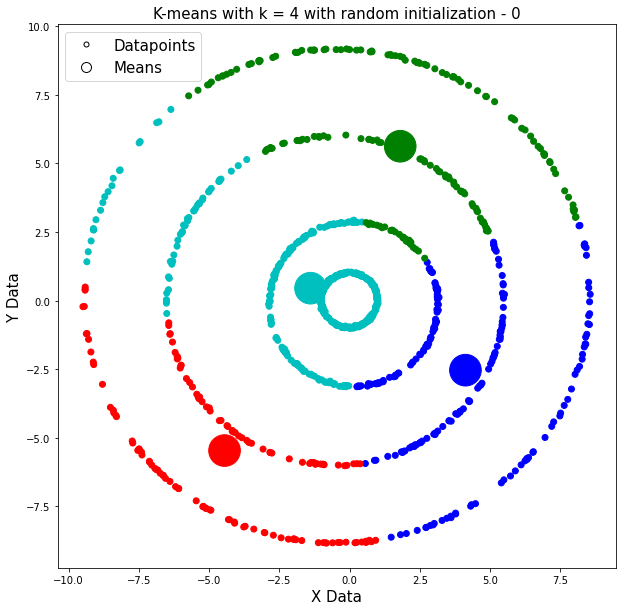

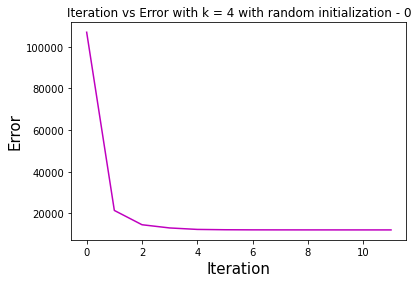

Random initialization 1


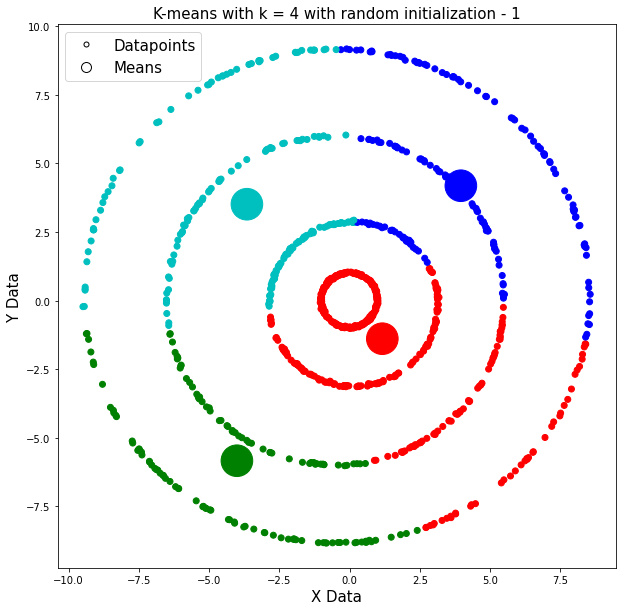

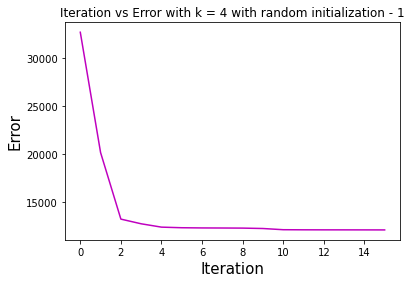

Random initialization 2


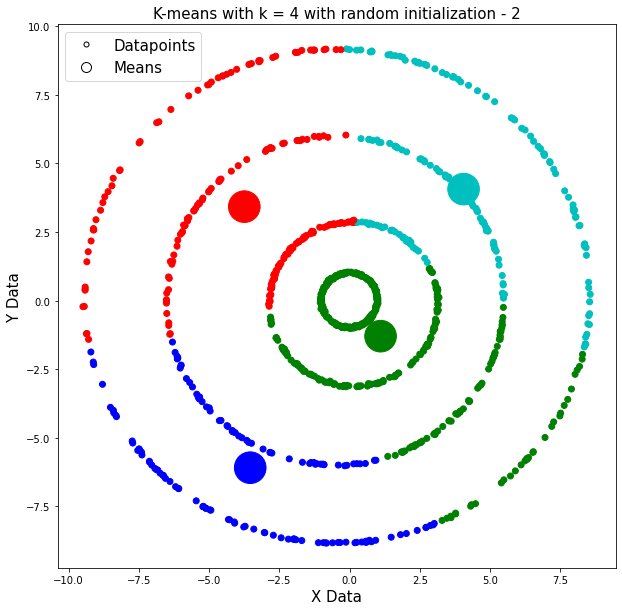

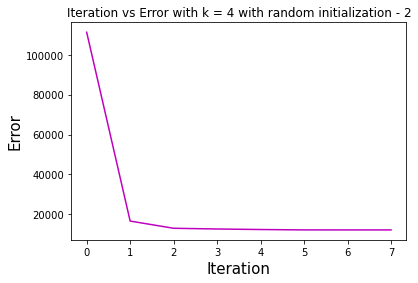

Random initialization 3


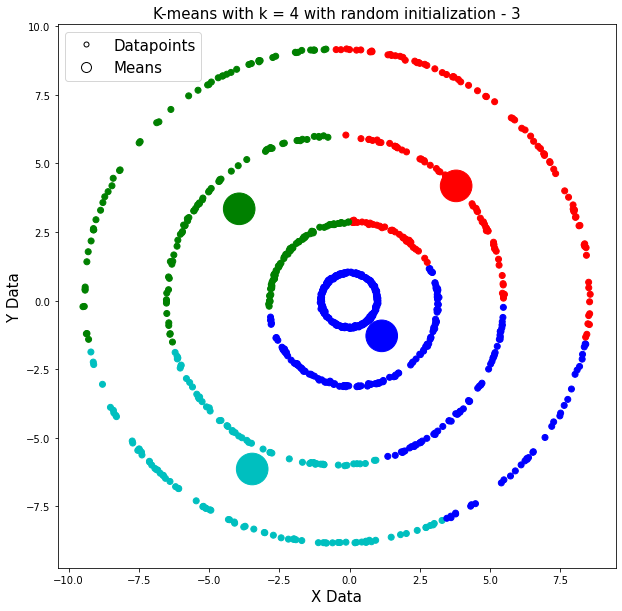

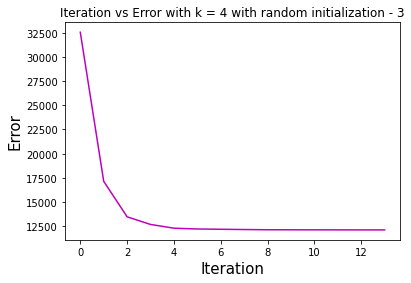

Random initialization 4


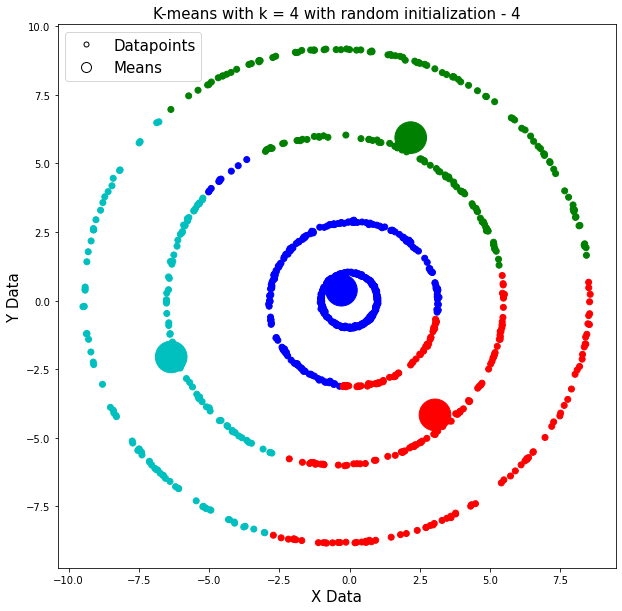

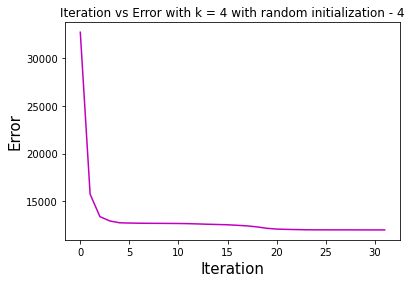

# 2.2 For K={2,3,4,5} obtain cluster center based on fixed initialization

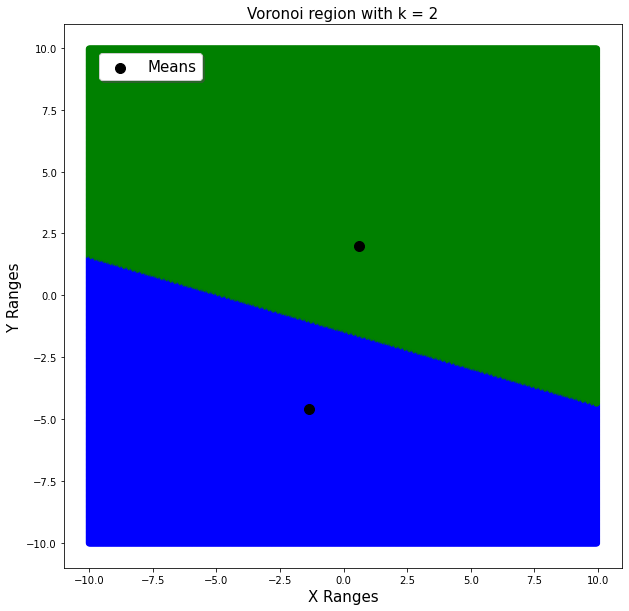

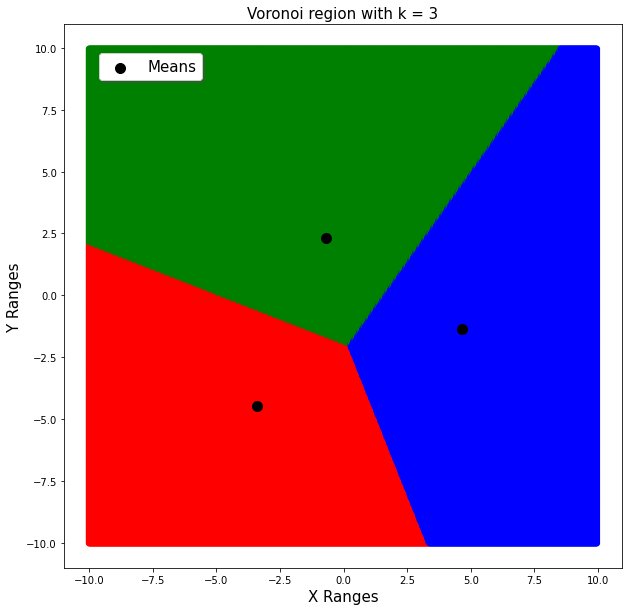

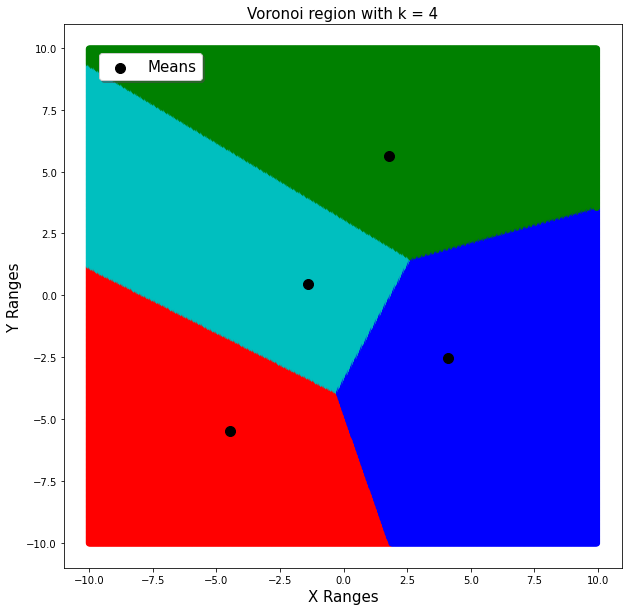

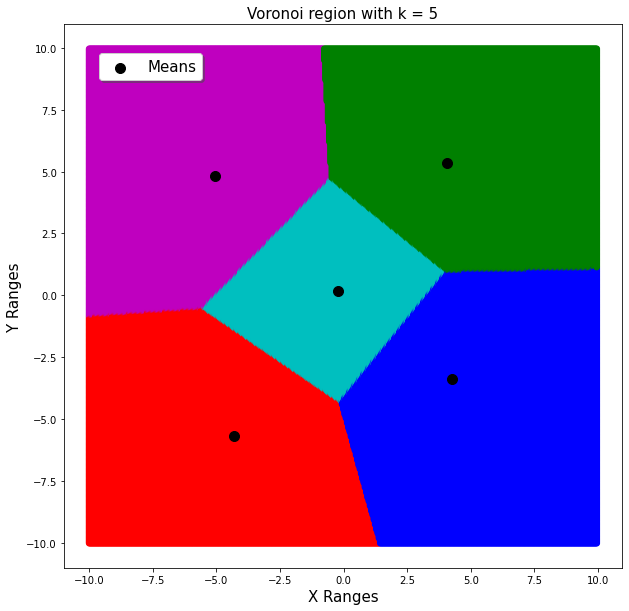

array([[ 4.2501576 ,  4.07991944, -4.29908404, -0.20195557, -5.05198272],
       [-3.37887377,  5.35751875, -5.6759684 ,  0.15990968,  4.81143115]])

In [286]:
def findIndicatorOfVoronoi(x,y,means):
    indicator=[]
    size=len(x);
    
    for i in range(size):
        cord=np.array([x[i],y[i]])
        indicator.append(getIndicatorOfX(cord,means,0));
    
    return indicator
def voronoiRegions(means):
    x=[]
    y=[]
    
    #create 
    for i in np.arange(-10,10,0.05):
        for j in np.arange(-10,10,0.05):
            x.append(i)
            y.append(j)
    
    indicator=findIndicatorOfVoronoi(x,y,means)
    LABEL_COLOR_LIST=["b","g","r","c","m","y","k","w"]
    color_label=[LABEL_COLOR_LIST[i] for i in indicator]
    
    plt.figure(figsize=(10, 10))
    
    plt.xlabel("X Ranges",fontsize=15)
    plt.ylabel("Y Ranges",fontsize=15)
    plt.title("Voronoi region with k = "+str(means.shape[1]),fontsize=15)
    
    plt.scatter(x,y,c=color_label)
    plt.scatter(means[0],means[1],c="black",s=100,label="Means")
    
    
    plt.legend(fontsize=15,loc='upper left', bbox_to_anchor=(0.05, 0.96),
          ncol=3, fancybox=True, shadow=True, borderpad=0.4)
    plt.show()

K_value=[2,3,4,5]

for k in K_value:
    means,indicator,_,_=Kmeans(data,k,0)
    plotKmeans(data,indicator,means,k,0)
    voronoiRegions(means)

# 2.3 Run the spectral clustering algorithm (spectral relaxation of K-means using Kernel PCA) k = 4. Choose an appropriate kernel for this data-set and plot the clusters obtained in different colors. Explain your choice of kernel based on the output you obtain.

/tmp/ipykernel_62160/3366165545.py:110: ComplexWarning: Casting complex values to real discards the imaginary part
  means[i]=val
/tmp/ipykernel_62160/3366165545.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  means[:,i]=mean/count


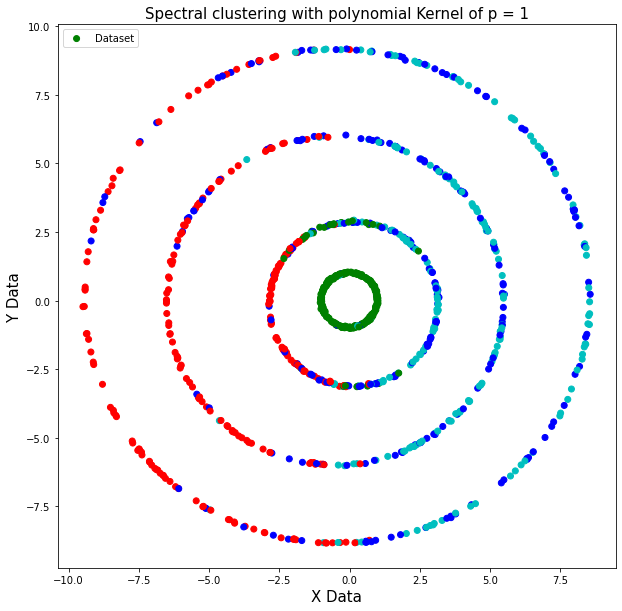

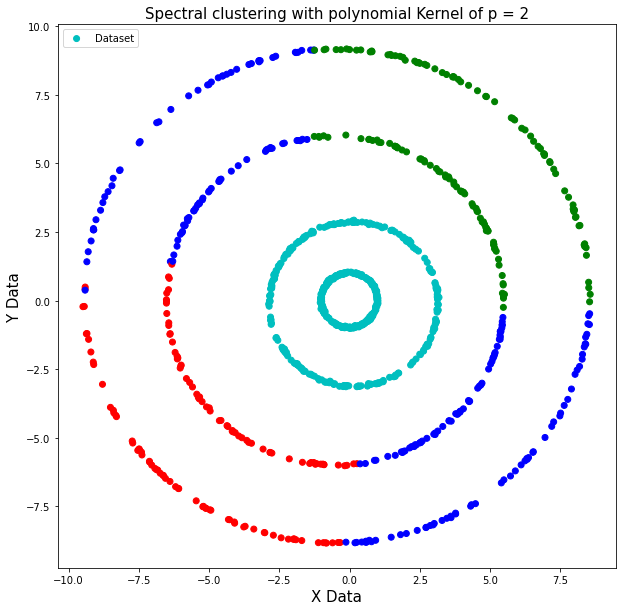

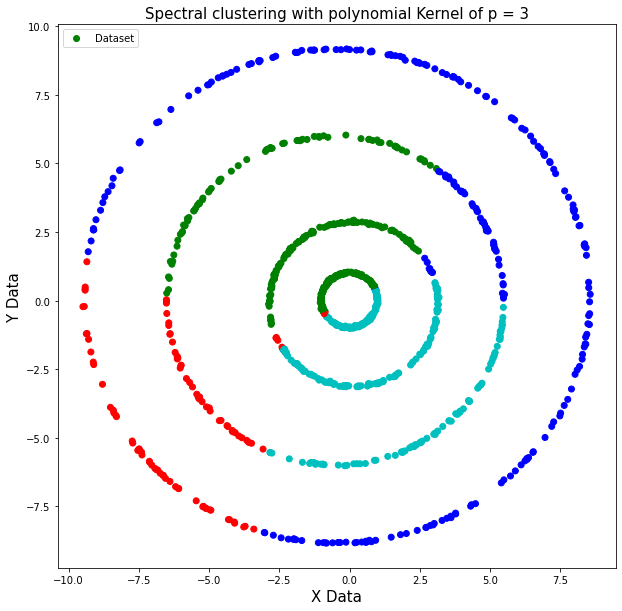

/tmp/ipykernel_62160/3491088574.py:67: RuntimeWarning: divide by zero encountered in true_divide
  H[i] = H[i]/norm[i]
/tmp/ipykernel_62160/3491088574.py:67: RuntimeWarning: invalid value encountered in true_divide
  H[i] = H[i]/norm[i]


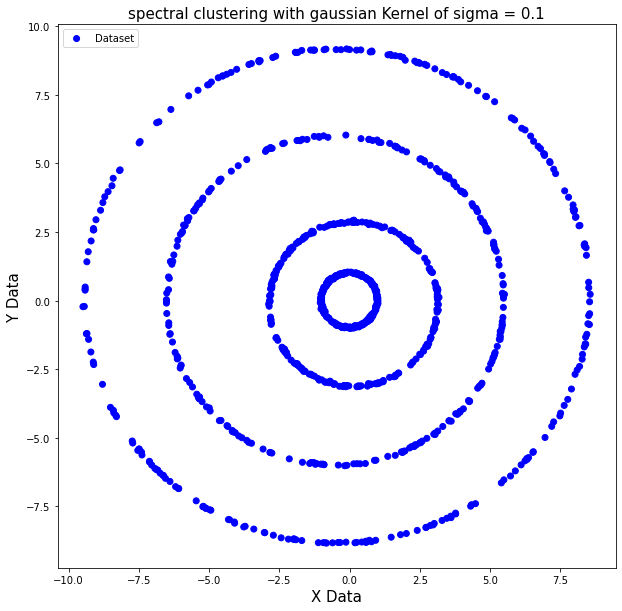

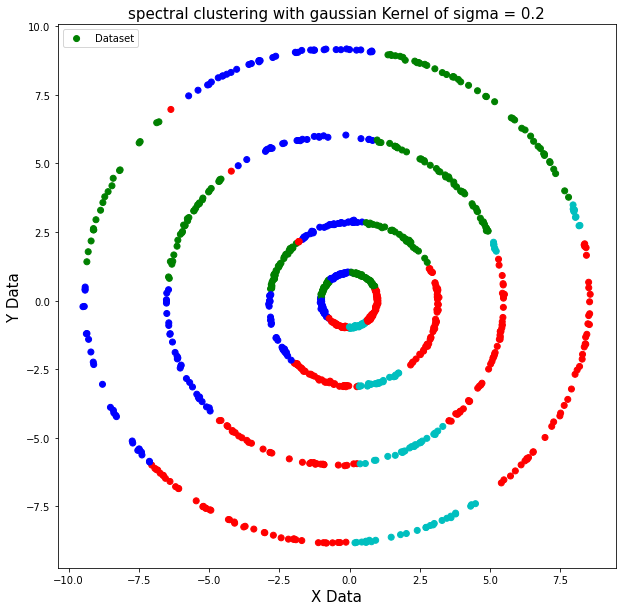

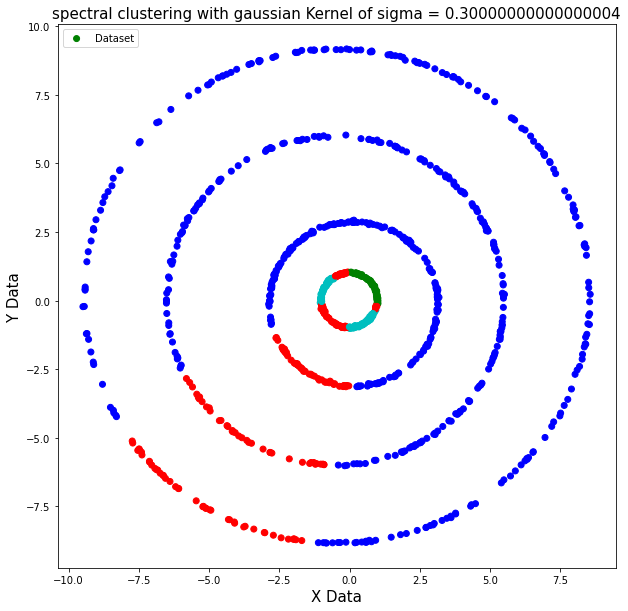

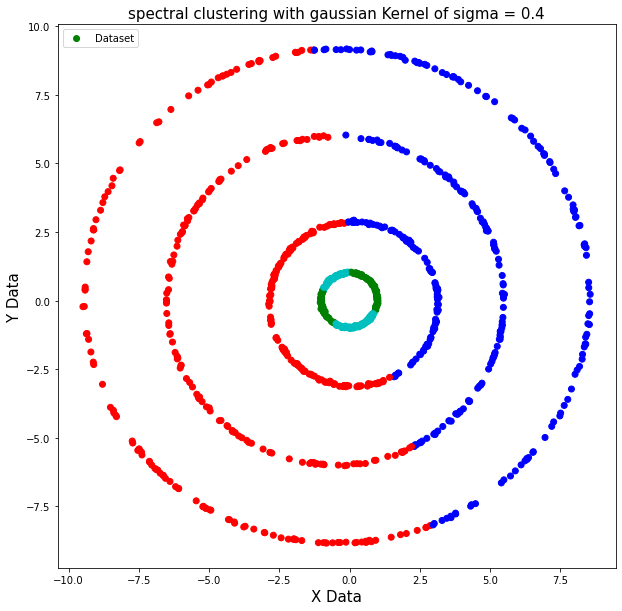

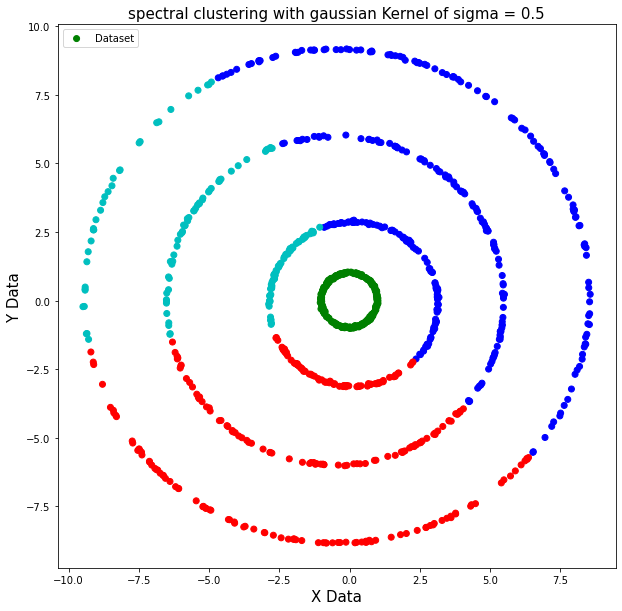

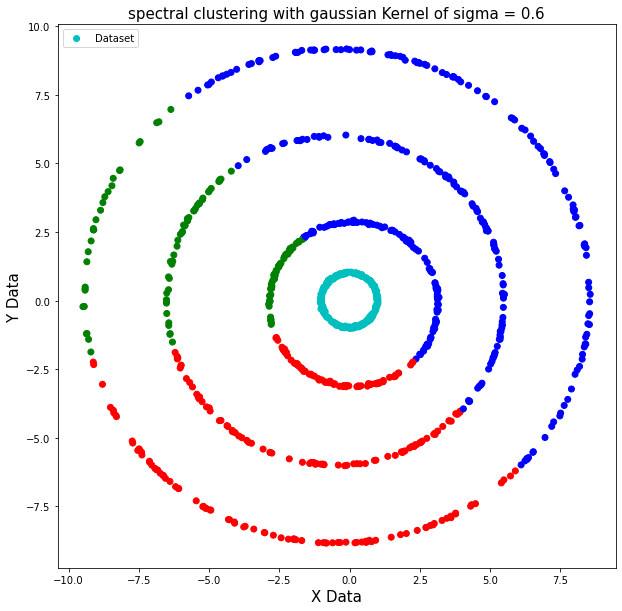

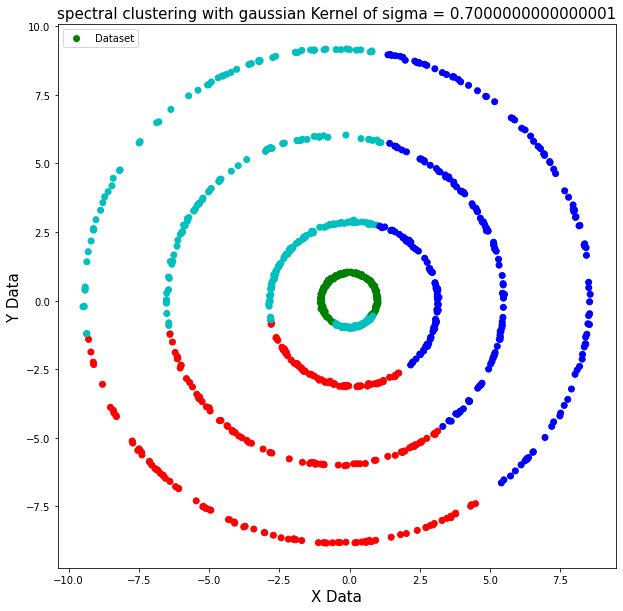

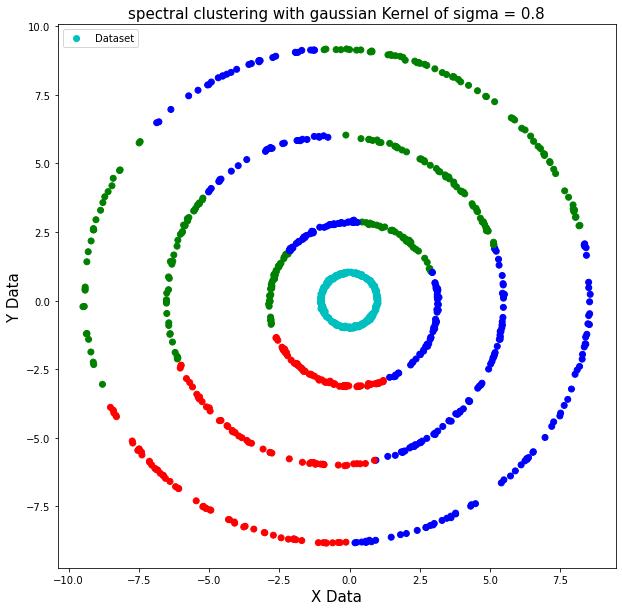

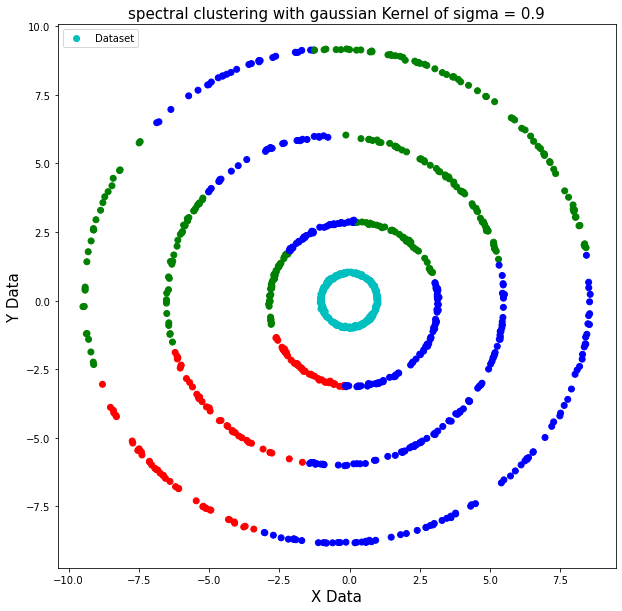

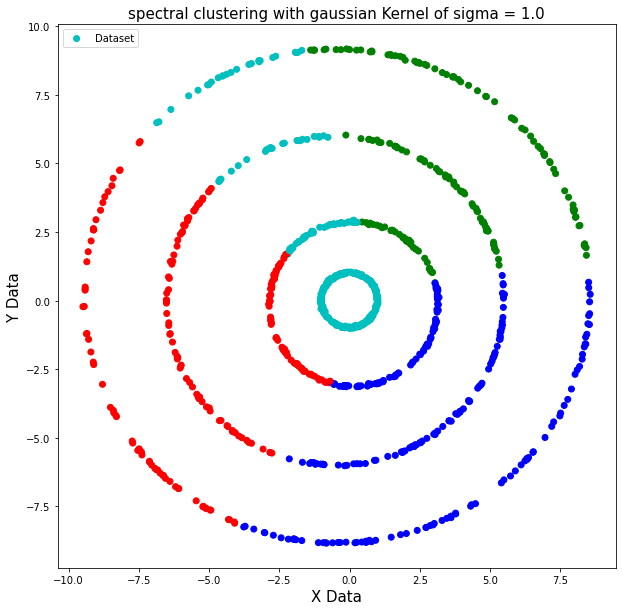

In [424]:
def findEigen(covariance_matrix):
    eigen_value,eigen_vector= np.linalg.eig(covariance_matrix)
    return eigen_value,eigen_vector
def findTopKEigenVec(eigen_vector,eigen_value,k):
    n=eigen_value.shape[0]
    highest_eigen_val_index = eigen_value.argsort()[::-1]
    w=[] #top k eigen vectors are stored
    for i in range(k):
        w.append(np.array(eigen_vector[:,highest_eigen_val_index[i]]))
        w[i]=w[i].reshape(eigen_vector.shape[1],1)
    return w
def polynomial_kernel(x,y,p):
    value=(x.transpose() @ y) + 1
    value=value**p;
    return value;

def gaussian_kernel(x,y,sigma):
    sub_val=x-y
    power_term=-(sub_val.transpose() @ sub_val)/(2*(sigma**2))
    value=np.exp(power_term)
    return value


def computePolynomilaKernelMatrix(data,polynomial):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=polynomial_kernel(data[:,i],data[:,j],polynomial)
    
    return K

def computeGaussianKernelMatrix(data,sigma):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=gaussian_kernel(data[:,i],data[:,j],sigma)
    
    return K
  
def plotKKmeans(data,indicator,k,title):
    LABEL_COLOR_LIST=["b","g","r","c","m","y","k","w"]
    color_label=[LABEL_COLOR_LIST[i] for i in indicator]
    
    plt.figure(figsize=(10, 10))
    plt.scatter(data[0],data[1],c=color_label,label="Dataset")
    

    plt.title(title,fontsize=15)
    plt.xlabel("X Data",fontsize=15)
    plt.ylabel("Y Data",fontsize=15)
    plt.legend(loc="upper left")
    plt.show()
    
def spectralKmeans(K,title):
    k=4
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,8)
    
    H=np.concatenate( beta, axis=1 )
    
    norm=np.linalg.norm(H, axis=1)
    
    for i in range(len(H)):
        H[i] = H[i]/norm[i]
    
    H=H.transpose()
    means,indicator,iteration,error=Kmeans(H,k,0)
    plotKKmeans(data,indicator,k,title)

    
polynomials=[1,2,3]
sigmas=np.arange(0.1,1.1,0.1)

for polynomial in polynomials:
    K=computePolynomilaKernelMatrix(data,polynomial)
    title="Spectral clustering with polynomial Kernel of p = "+str(polynomial)
    spectralKmeans(K,title)

for sigma in sigmas:
    K=computeGaussianKernelMatrix(data,sigma)
    title="spectral clustering with gaussian Kernel of sigma = "+str(sigma)
    spectralKmeans(K,title)

# 2.4 using argmax to find the indicators

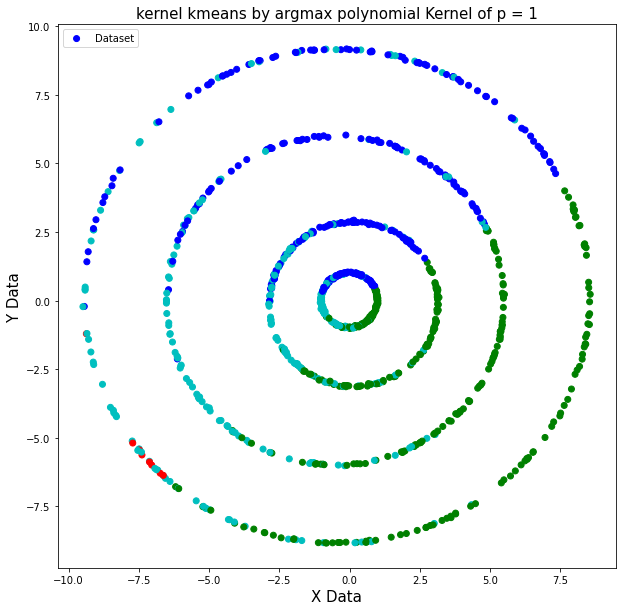

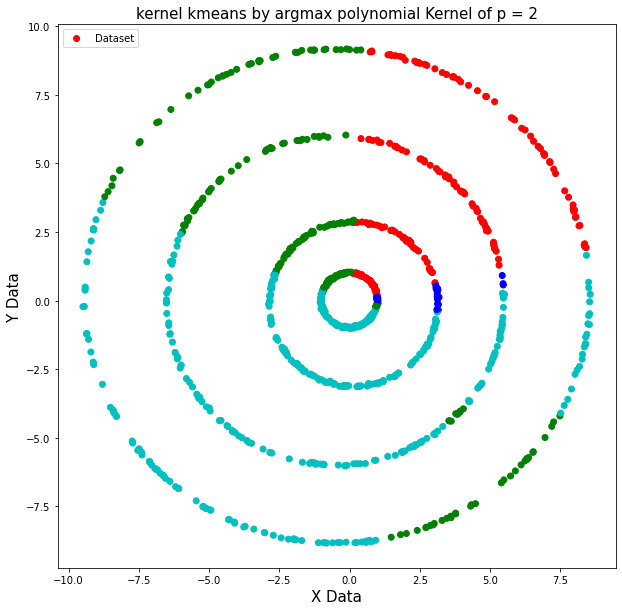

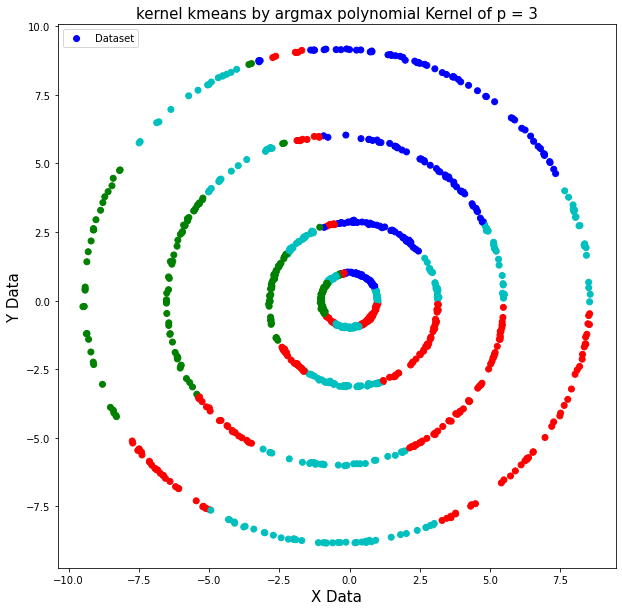

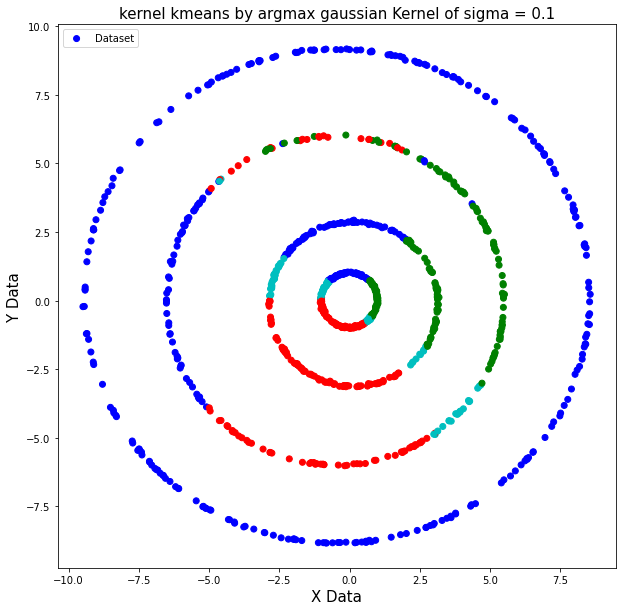

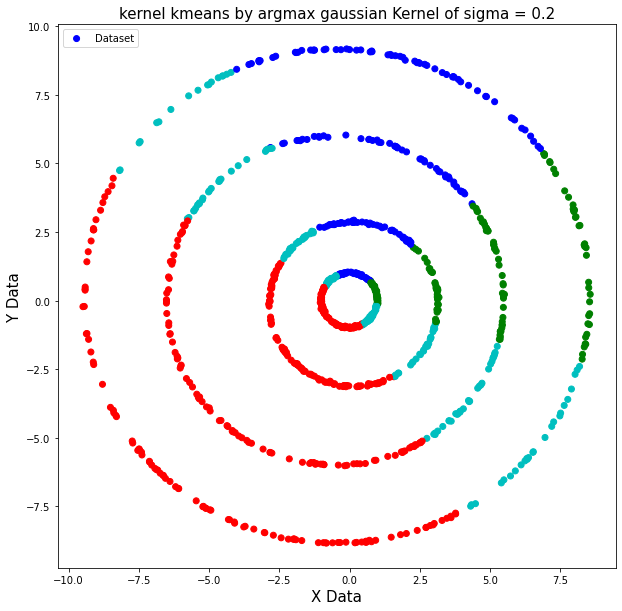

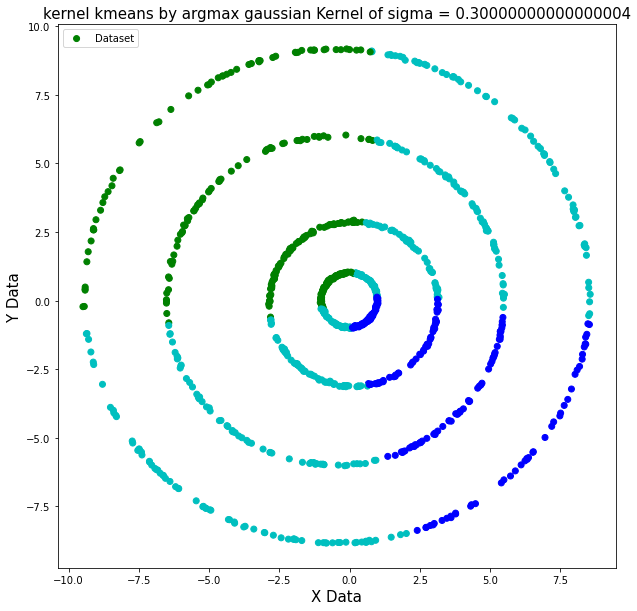

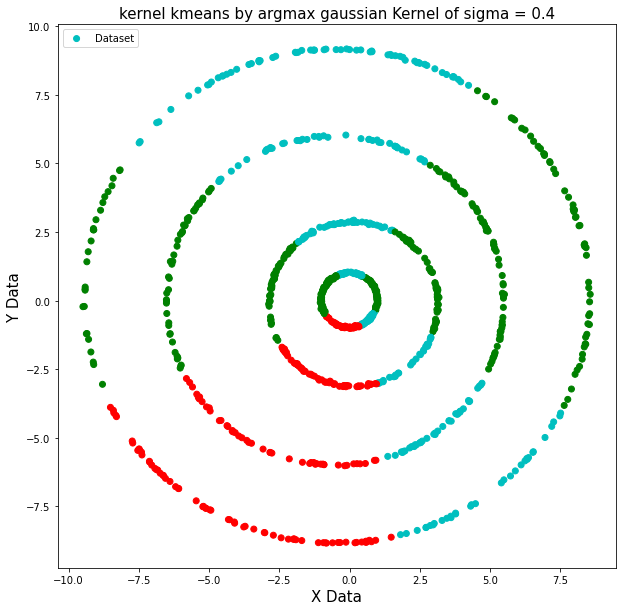

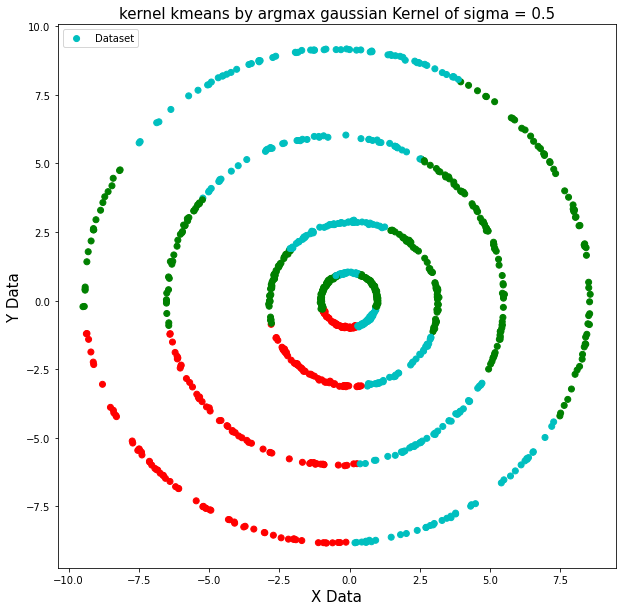

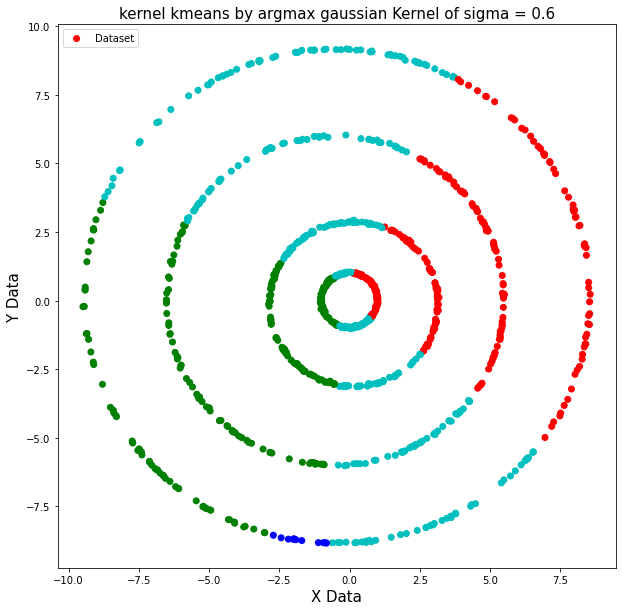

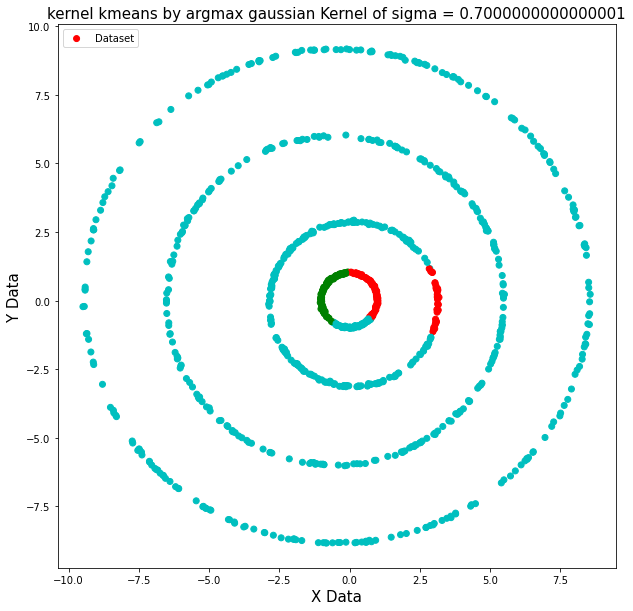

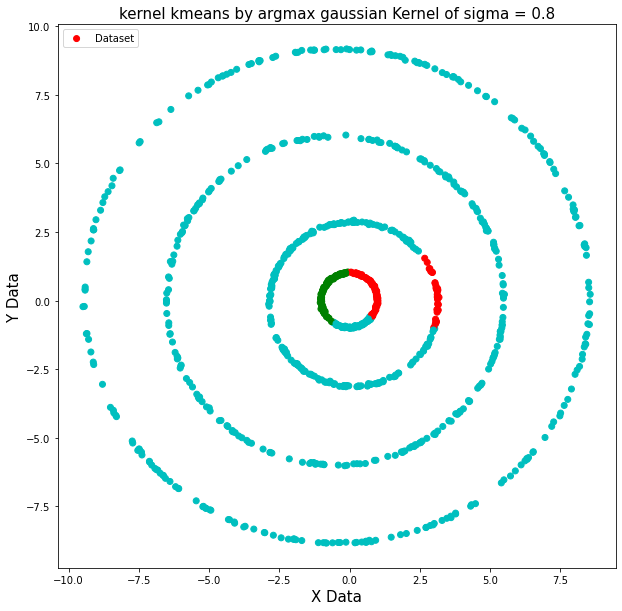

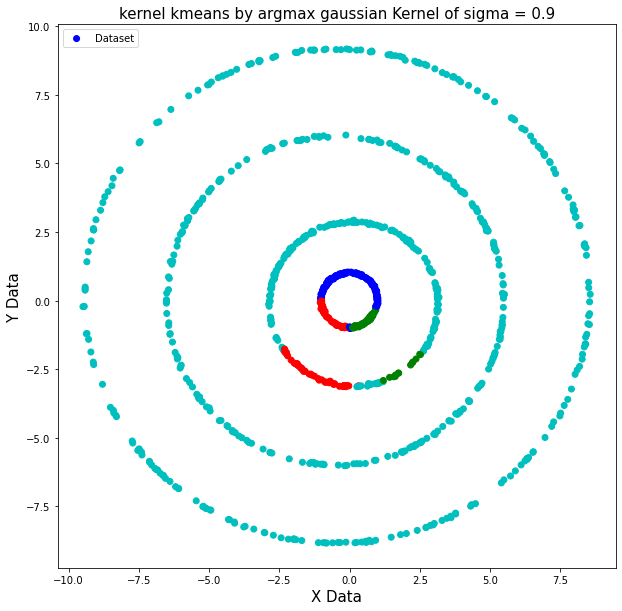

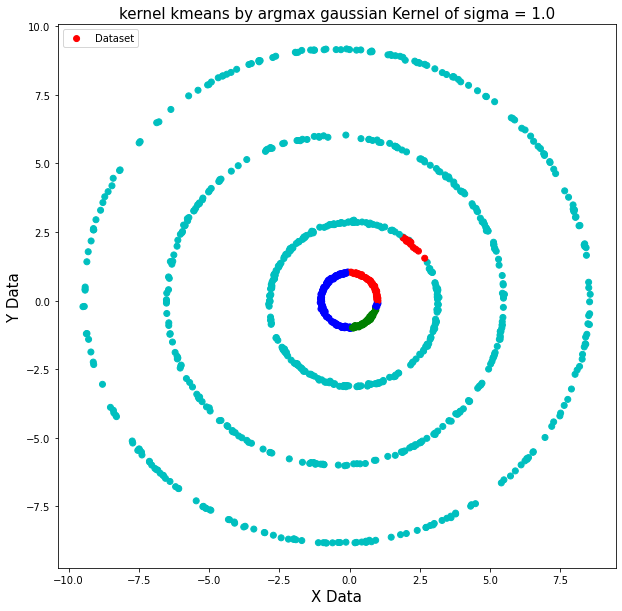

In [413]:
def KKmeans(K,title):
    k=4
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,4)
    
    H=np.concatenate( beta, axis=1 )
    
    indicator=np.argmax(H,axis=1)
    plotKKmeans(data,indicator,k,title)


polynomials=[1,2,3]
sigmas=np.arange(0.1,1.1,0.1)

for polynomial in polynomials:
    K=computePolynomilaKernelMatrix(data,polynomial)
    title="kernel kmeans by argmax polynomial Kernel of p = "+str(polynomial)
    KKmeans(K,title)

for sigma in sigmas:
    K=computeGaussianKernelMatrix(data,sigma)
    title="kernel kmeans by argmax gaussian Kernel of sigma = "+str(sigma)
    KKmeans(K,title)